In [86]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [87]:
df=pd.read_csv("G:\My Drive\ps\data\ddata.csv") 
df=df.drop(columns=['Unnamed: 0'])
x=df.iloc[:,:-2]
y=df.iloc[:,-2]

In [88]:
x,y

(        0    1    2     3    4    5    6    7    8
 0    0.75  0.5  0.5  2.50  2.5  2.5  0.5  2.5  2.5
 1    0.75  0.5  0.5  2.50  2.5  2.5  2.5  2.5  2.5
 2    0.75  0.5  0.5  2.50  2.5  2.5  2.5  2.5  2.5
 3    0.75  0.5  0.5  2.50  2.5  2.5  2.5  2.5  2.5
 4    0.75  0.5  0.5  2.50  2.5  2.5  2.5  2.5  2.5
 ..    ...  ...  ...   ...  ...  ...  ...  ...  ...
 524  0.75  0.5  2.5  0.75  1.5  1.5  0.5  0.5  0.5
 525  0.75  0.5  2.5  2.50  1.5  1.5  0.5  0.5  0.5
 526  0.75  0.5  2.5  2.50  1.5  1.5  0.5  0.5  0.5
 527  0.75  0.5  2.5  2.50  1.5  1.5  0.5  0.5  0.5
 528  1.50  0.5  0.5  0.75  1.5  2.5  0.5  2.5  2.5
 
 [529 rows x 9 columns],
 0                        Aus
 1        Indica Intermediate
 2                 Indica III
 3        Indica Intermediate
 4                 Indica III
                ...          
 524       Temperate Japonica
 525    Japonica Intermediate
 526       Temperate Japonica
 527       Temperate Japonica
 528             Intermediate
 Name: subpopulatio

In [89]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=42,test_size=0.33)

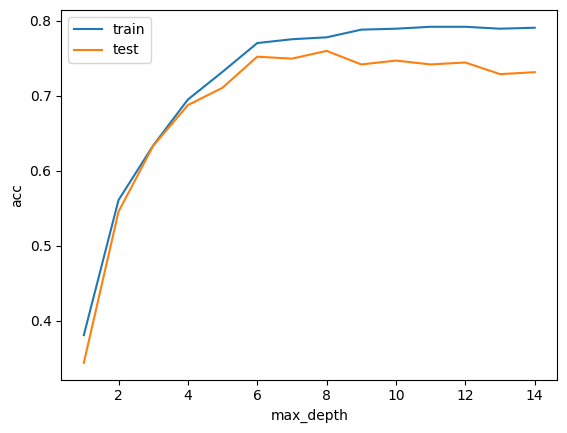

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
train_score=[]
test_score=[]
values=[i for i in range(1,15)]
for i in range(1,15):
  model_1=RandomForestClassifier(n_estimators=8,max_depth=i,random_state=42,criterion="gini",max_features='sqrt')
  model_1.fit(x_train,y_train)
  y_pred1=model_1.predict(x_train)
  acc1=accuracy_score(y_train,y_pred1)
  y_pred2=model_1.predict(x_test)
  acc2=accuracy_score(y_pred2,y_test)
  train_score.append(acc1)
  test_score.append(acc2)
plt.plot(values,train_score,label="train")
plt.plot(values,test_score,label="test")
plt.xlabel("max_depth")
plt.ylabel("acc")
plt.legend()
plt.show()

In [92]:
"""
from sklearn.ensemble import RandomForestClassifier
grid_p={'n_estimators':[i for i in range(1,30)],
        'max_depth':[i for i in range(20)],
        'criterion':['gini','entropy'],
        'max_features':['sqrt','log2',]
         }
from sklearn.model_selection import GridSearchCV
gs_1 = GridSearchCV(RandomForestClassifier(random_state=42),grid_p, verbose = 1, cv=4, n_jobs = -1)
g_re = gs_1.fit(x_train,y_train)
print(g_re.best_score_)
"""

"\nfrom sklearn.ensemble import RandomForestClassifier\ngrid_p={'n_estimators':[i for i in range(1,30)],\n        'max_depth':[i for i in range(20)],\n        'criterion':['gini','entropy'],\n        'max_features':['sqrt','log2',]\n         }\nfrom sklearn.model_selection import GridSearchCV\ngs_1 = GridSearchCV(RandomForestClassifier(random_state=42),grid_p, verbose = 1, cv=4, n_jobs = -1)\ng_re = gs_1.fit(x_train,y_train)\nprint(g_re.best_score_)\n"

In [93]:
#g_re.best_params_

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_r=RandomForestClassifier(n_estimators=7,max_depth=9,random_state=42,criterion="gini",max_features='sqrt',max_leaf_nodes=30)
model_r.fit(x_train,y_train)
yr_pred=model_r.predict(x_test)
accuracy_score(y_test,yr_pred)*100 

74.67700258397933

['hi', 'how', 'you', 'doing']

In [101]:
import pickle
pickle.dump(model_r,open('Clasim.pkl','wb'))

In [102]:
import numpy as np
ss=['GCCTTTCTC']
nuc=['A','T','C','G']
dicc={'A':1.5,'T':2.5,'C':0.5,'G':0.75}
encoded=[]
for i in ss:
    array = np.array(list(i))
    new_arr=np.array([dicc[i] for i in array])
    encoded.append((new_arr))

enc_dfff=pd.DataFrame(encoded)
zz=model_r.predict(enc_dfff)
enc_dfff['subb']=zz
enc_dfff


g:\My Drive\ps\ui\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,subb
0,0.75,0.5,0.5,2.5,2.5,2.5,0.5,2.5,0.5,Aus
